In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode,download_plotlyjs,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import statsmodels.api as sm  
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot 
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import OrdinalEncoder 

In [2]:
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\hp\\Desktop\\Data Analysis Notebooks': ['.ipynb_checkpoints', '01-Choropleth Maps.ipynb', '01-Distribution Plots.ipynb', '01-Matplotlib Concepts Lecture.ipynb', '01-Pandas Built-in Data Visualization.ipynb', '01-Plotly and Cufflinks.ipynb', '02-Categorical Plots.ipynb', '02-Choropleth Maps Exercise.ipynb', '02-Matplotlib Exercises.ipynb', '02-Pandas Data Visualization Exercise.ipynb', '03-Choropleth Maps Exercise - Solutions.ipynb', '03-Matplotlib Exercises - Solutions.ipynb', '03-Matrix Plots.ipynb', '03-Pandas Data Visualization Exercise - Solutions.ipynb', '04-Advanced Matplotlib Concepts.ipynb', '04-Grids.ipynb', '05-Regression Plots.ipynb', '06-Style and Color.ipynb', '07-Seaborn Exercises.ipynb', '08-Seaborn Exercises - Solutions.ipynb', '11.1 Unpivot_Demo.csv.csv', '2011_US_AGRI_Exports', '2012_Election_Data', '2014_World_GDP', '2014_World_Power_Consumption', '2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', '3.4 AdventureWorks_Logo.png.png', '4.3_

In [4]:
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')
df4 = pd.read_csv('2018.csv')
df5 = pd.read_csv('2019.csv')

In [5]:
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(782, 30)

In [7]:
print('Percentage of null values for each column:')
for col in df.columns:
  print(str(col)+':',str(np.round((df[col].isnull().sum()/len(df[col])*100),2)) + '%')

Percentage of null values for each column:
Country: 39.9%
Region: 59.72%
Happiness Rank: 59.72%
Happiness Score: 59.72%
Standard Error: 79.8%
Economy (GDP per Capita): 59.72%
Family: 39.9%
Health (Life Expectancy): 59.72%
Freedom: 39.9%
Trust (Government Corruption): 59.72%
Generosity: 0.0%
Dystopia Residual: 59.72%
Lower Confidence Interval: 79.92%
Upper Confidence Interval: 79.92%
Happiness.Rank: 80.18%
Happiness.Score: 80.18%
Whisker.high: 80.18%
Whisker.low: 80.18%
Economy..GDP.per.Capita.: 80.18%
Health..Life.Expectancy.: 80.18%
Trust..Government.Corruption.: 80.18%
Dystopia.Residual: 80.18%
Overall rank: 60.1%
Country or region: 60.1%
Score: 60.1%
GDP per capita: 60.1%
Social support: 60.1%
Healthy life expectancy: 60.1%
Freedom to make life choices: 60.1%
Perceptions of corruption: 60.23%


**Checking for duplicate values**

In [8]:
df[df.duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Lower Confidence Interval      157 non-null    flo

In [10]:
df.drop(columns=['Standard Error','Country or region','Dystopia.Residual','Whisker.high','Whisker.low','Happiness.Rank','Happiness.Score','Overall rank','Score','Economy..GDP.per.Capita.','Health..Life.Expectancy.','Trust..Government.Corruption.','Happiness Rank','Dystopia Residual','Social support','GDP per capita','Healthy life expectancy','Lower Confidence Interval','Upper Confidence Interval','Freedom to make life choices','Perceptions of corruption'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Score                315 non-null    float64
 3   Economy (GDP per Capita)       315 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       315 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     782 non-null    float64
dtypes: float64(7), object(2)
memory usage: 61.1+ KB


In [12]:
df.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272
Economy (GDP per Capita),0.779171,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402
Family,0.693547,0.566283,1.000000,0.569937,0.425377,0.205060,0.071775
Health (Life Expectancy),0.734491,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002
Freedom,0.556414,0.331127,0.425377,0.369799,1.000000,0.492875,0.343389
Trust (Government Corruption),0.397989,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499
Generosity,0.168272,-0.015402,0.071775,0.088002,0.343389,0.289499,1.000000


<AxesSubplot:>

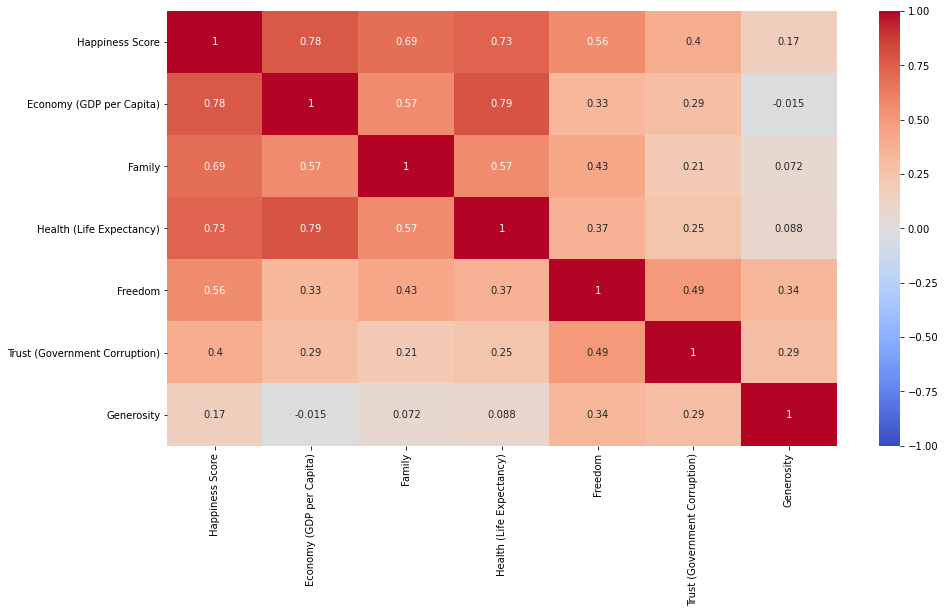

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

*There is a mild positive correlation between Freedom and each of Trust Government Curruption and Family.*

**Let's identify the top 10 countries with best happiness score.**

In [14]:
top_10_countries = df.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).reset_index()[:10]
top_10_countries

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.413
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.334
9,Australia,7.313


Text(0.5, 1.0, 'Top 10 Happiest Countries')

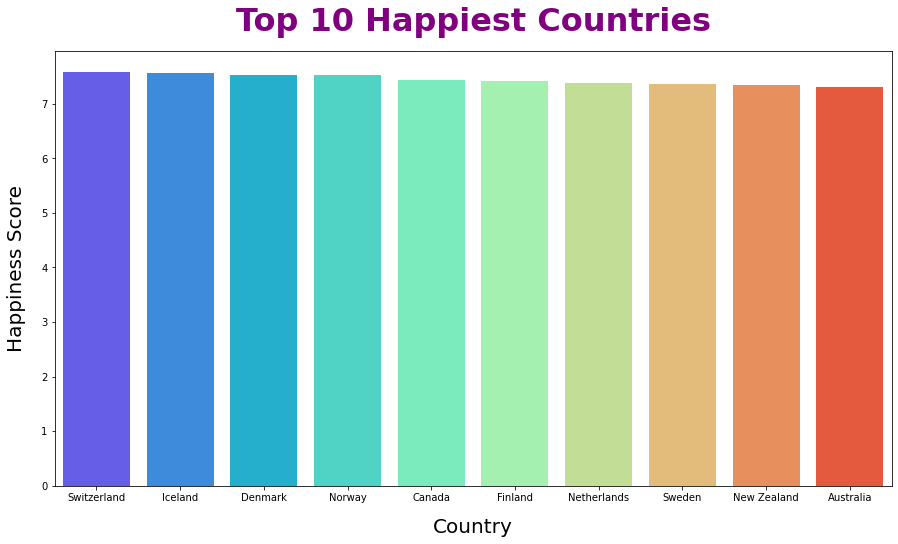

In [15]:
sns.barplot(x='Country',y='Happiness Score',data=top_10_countries,palette='rainbow')
plt.xlabel('Country',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Top 10 Happiest Countries',fontsize=32,pad=20,color='purple',fontweight='bold')

***Switzerland is the happiest country in the world closely followed by Iceland.***

**Let's find the top 10 countries with least happiness scores.**

In [16]:
least_happiness_scores = df.groupby('Country')['Happiness Score'].min().sort_values().reset_index()[:10]
least_happiness_scores

,Country,Happiness Score
0,Togo,2.839
1,Burundi,2.905
2,Syria,3.006
3,Benin,3.340
4,Afghanistan,3.360
5,Rwanda,3.465
6,Burkina Faso,3.587
7,Guinea,3.607
8,Liberia,3.622
9,Ivory Coast,3.655


Text(0.5, 1.0, 'Top 10 Countries with Least Happiness Score')

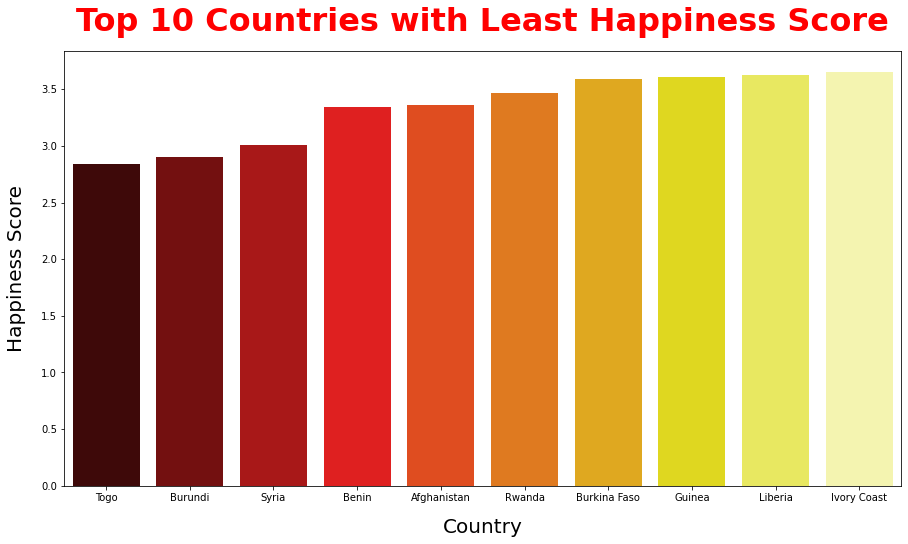

In [17]:
sns.barplot(x='Country',y='Happiness Score',data=least_happiness_scores,palette='hot')
plt.xlabel('Country',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Top 10 Countries with Least Happiness Score',fontsize=32,pad=20,color='red',fontweight='bold')

***Togo is the least happiest country in the world.***

## **Let's do the same for regions as well.**

In [18]:
most_happiest_regions = df.groupby('Region')['Happiness Score'].max().sort_values(ascending=False).reset_index()[:10]
most_happiest_regions

,Region,Happiness Score
0,Western Europe,7.587
1,North America,7.427
2,Australia and New Zealand,7.334
3,Middle East and Northern Africa,7.278
4,Latin America and Caribbean,7.226
5,Southeastern Asia,6.798
6,Central and Eastern Europe,6.596
7,Eastern Asia,6.379
8,Sub-Saharan Africa,5.648
9,Southern Asia,5.253


Text(0.5, 1.0, 'Most Happiest Regions in the World')

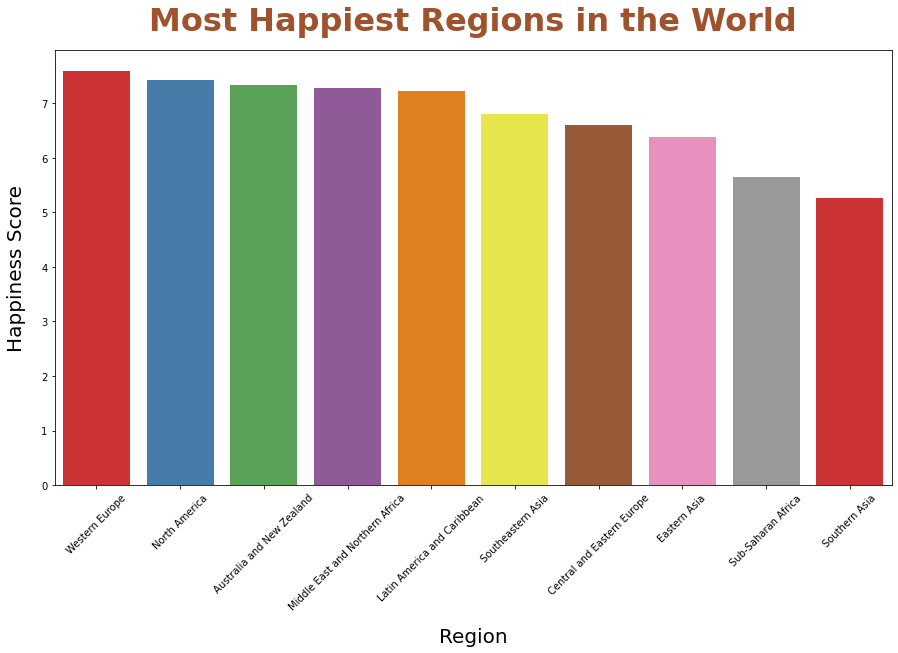

In [19]:
sns.barplot(x='Region',y='Happiness Score',data=most_happiest_regions,palette='Set1')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Most Happiest Regions in the World',fontsize=32,pad=20,color='sienna',fontweight='bold')

Western Europe is the most happiest continent in the world.

In [20]:
least_happiness_regions = df.groupby('Region')['Happiness Score'].min().sort_values().reset_index()[:10]
least_happiness_regions

,Region,Happiness Score
0,Sub-Saharan Africa,2.839
1,Middle East and Northern Africa,3.006
2,Southern Asia,3.360
3,Southeastern Asia,3.819
4,Latin America and Caribbean,4.028
5,Central and Eastern Europe,4.217
6,Western Europe,4.857
7,Eastern Asia,4.874
8,North America,7.104
9,Australia and New Zealand,7.284


Text(0.5, 1.0, 'Least Happiest Regions in the World')

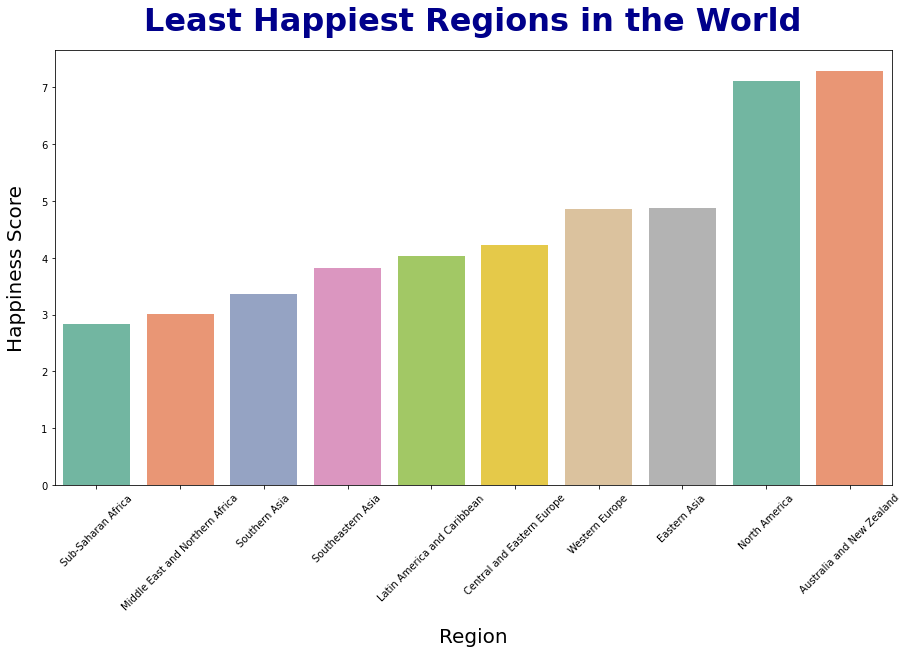

In [21]:
sns.barplot(x='Region',y='Happiness Score',data=least_happiness_regions,palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Least Happiest Regions in the World',fontsize=32,pad=20,color='darkblue',fontweight='bold')

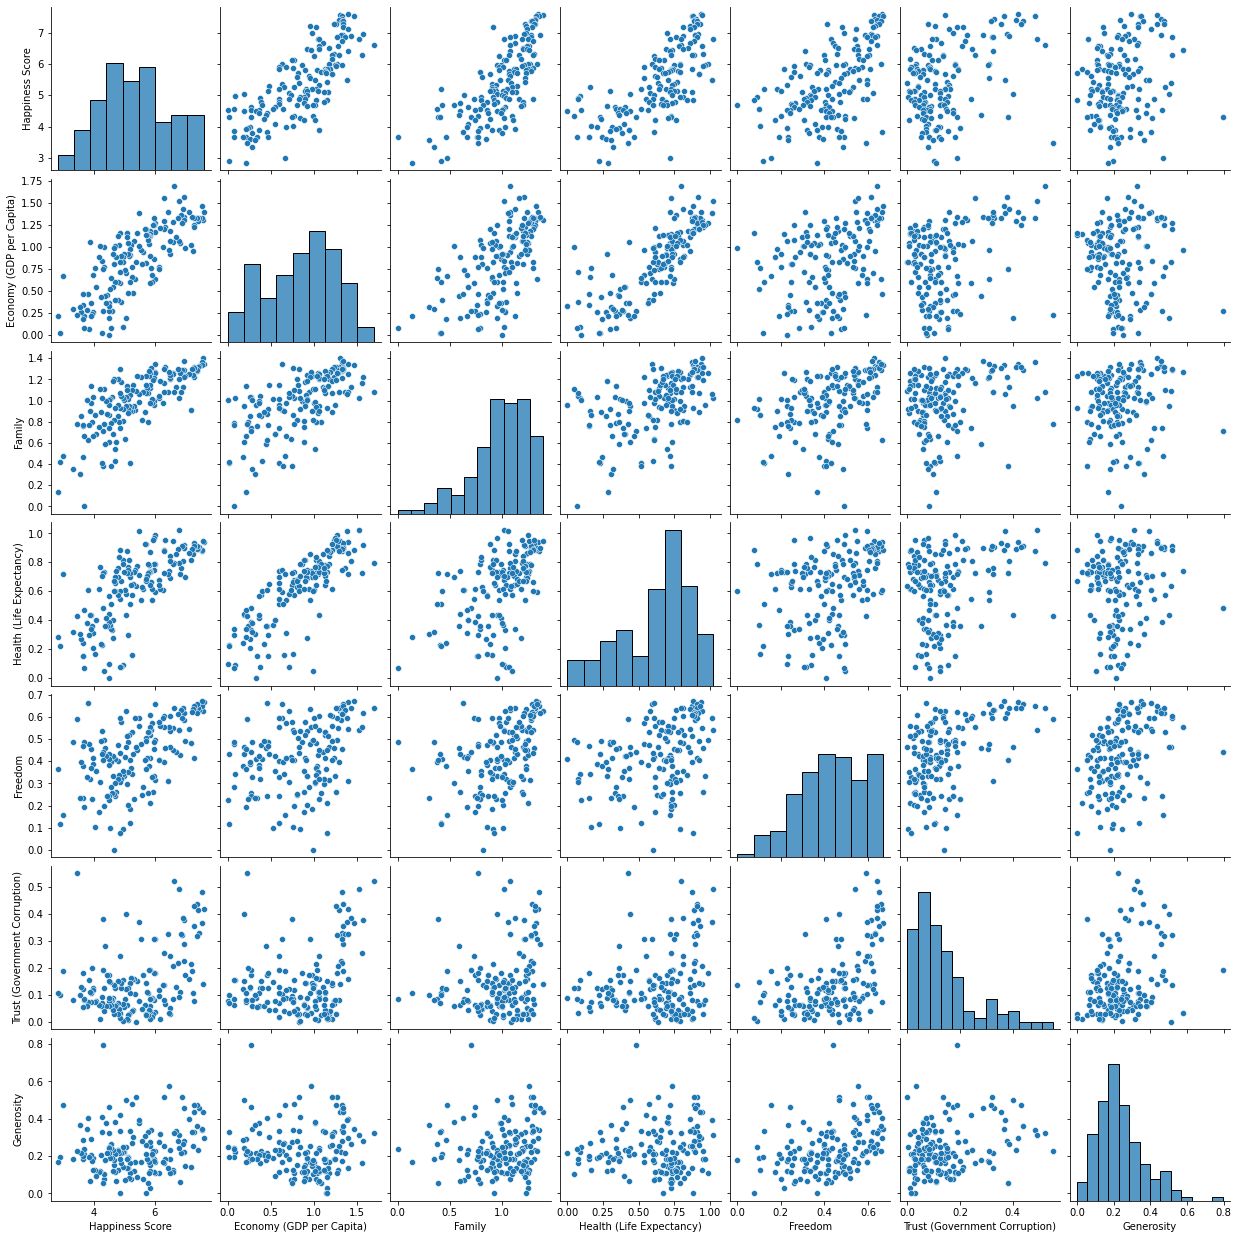

In [22]:
df_numerical = df.select_dtypes(np.float64)
df_numerical = df_numerical[~df_numerical.index.duplicated()]
sns.pairplot(df_numerical)

Text(0.5, 1.0, 'Effect of GDP on Happiness Score')

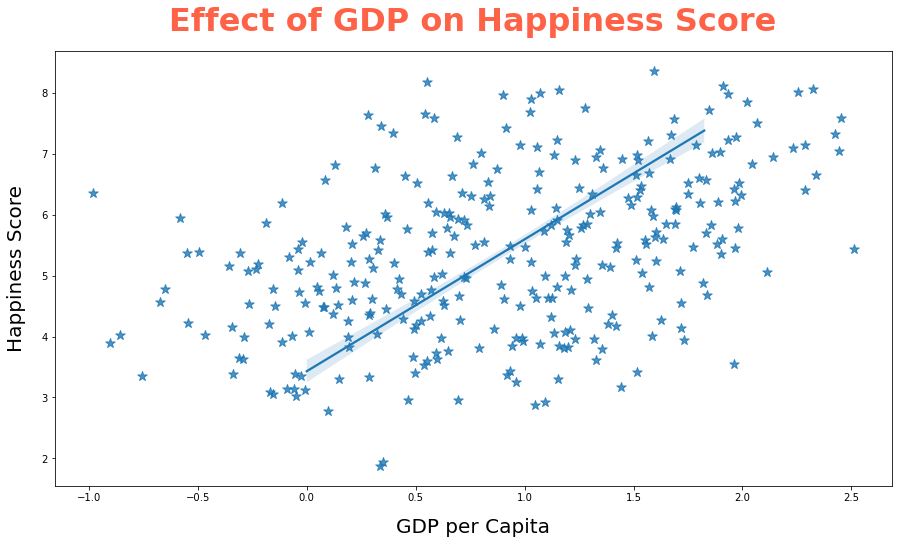

In [23]:
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df,marker='*',x_jitter=True,y_jitter=True,scatter_kws={'s': 100})
plt.xlabel('GDP per Capita',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Effect of GDP on Happiness Score',fontsize=32,pad=20,color='tomato',fontweight='bold')

Text(0.5, 1.0, 'Effect of Family on Happiness Score')

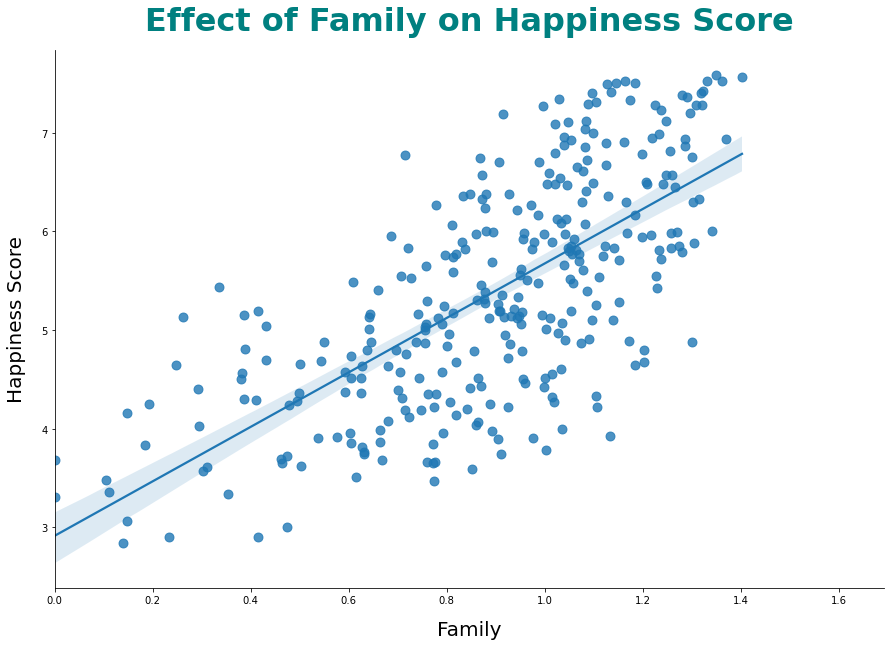

In [24]:
sns.lmplot(x='Family',y='Happiness Score',data=df,scatter_kws={'s':80},height=8,aspect=1.5)
plt.xlabel('Family',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Effect of Family on Happiness Score',fontsize=32,color='teal',fontweight='bold',pad=20)

Text(0.5, 1.0, 'Effect of Health (Life Expectancy) on Happiness Score')

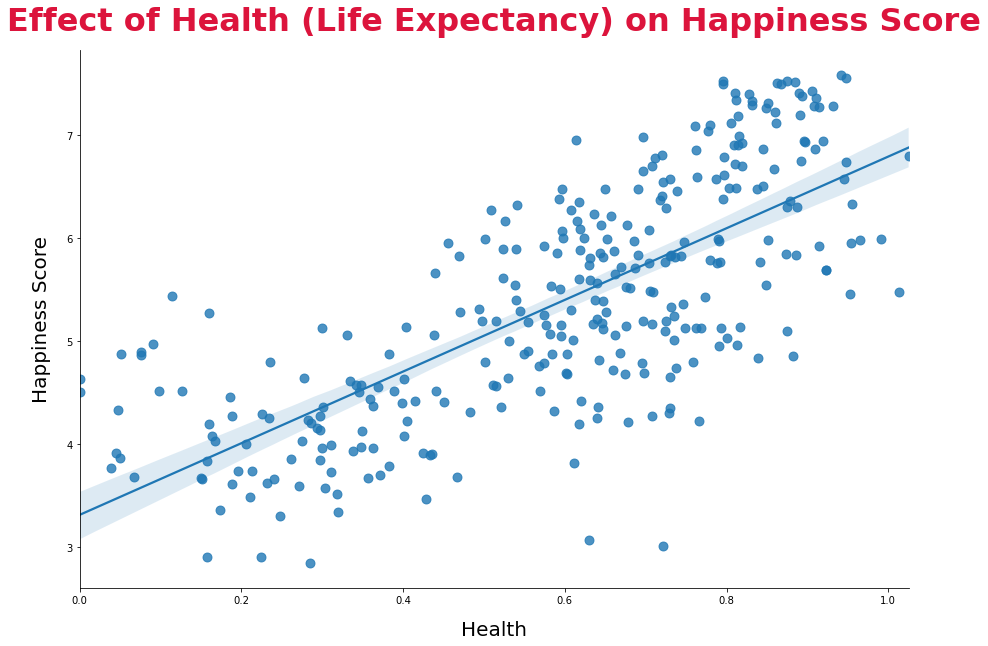

In [25]:
sns.lmplot(x='Health (Life Expectancy)',y='Happiness Score',data=df,scatter_kws={'s':80},height=8,aspect=1.5)
plt.xlabel('Health',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Effect of Health (Life Expectancy) on Happiness Score',fontsize=32,color='crimson',fontweight='bold',pad=20)

Text(0.5, 1.0, 'Freedom vs. Happiness Score')

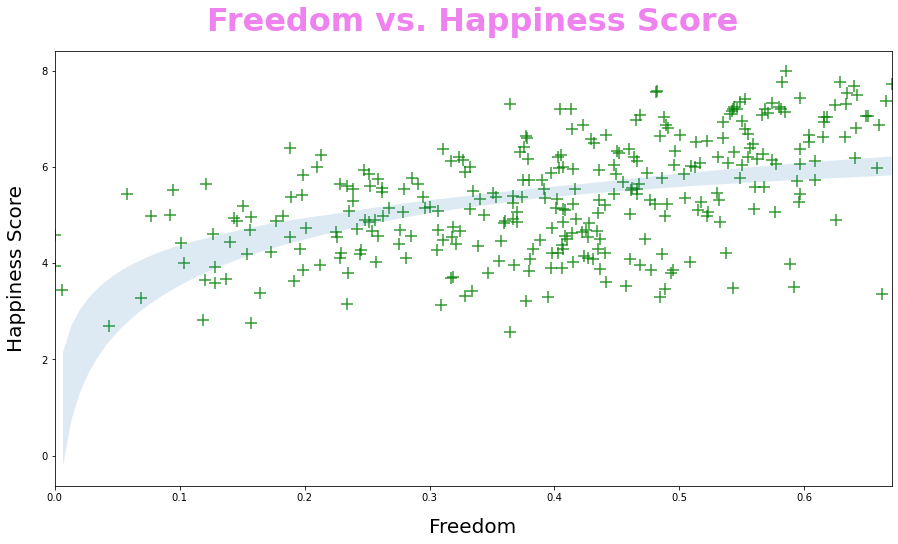

In [26]:
sns.regplot(x='Freedom',y='Happiness Score',data=df,marker='+',scatter_kws={'s':150,'color': 'green'},logx=True,y_jitter=0.5)
plt.xlabel('Freedom',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Freedom vs. Happiness Score',fontsize=32,color='violet',pad=20,fontweight='bold')

## **Let's perform multivariate regression analysis to study effect of various parameters on overall happiness score.**



In [27]:
df['Family'].fillna(df['Family'].mean(),inplace=True)
df['Freedom'].fillna(df['Freedom'].mean(),inplace=True)
df['Economy (GDP per Capita)'].fillna(df['Economy (GDP per Capita)'].mean(),inplace=True)
df['Health (Life Expectancy)'].fillna(df['Health (Life Expectancy)'].mean(),inplace=True)
df['Happiness Score'].fillna(df['Happiness Score'].mean(),inplace=True)

In [28]:
X = df[['Family','Freedom','Economy (GDP per Capita)','Health (Life Expectancy)']]
Y = df['Happiness Score']

In [29]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     470.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          9.74e-206
Time:                        20:30:08   Log-Likelihood:                -375.60
No. Observations:                 782   AIC:                             761.2
Df Residuals:                     777   BIC:                             784.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.6350      0.071     37.120      0.000       2.496       2.774
Family                       0.3605      0.067      5.346      0.000       0.228       0.493
Freedom                      1.2401      0.135      9.205      0.000       0.976       1.505
Economy (GDP per Capita)     1.3448      0.089     15.140      0.000       1.170       1.519
Health (Life Expectancy)     1.1401      0.153      7.476      0.000       0.841       1.439
==============================================================================
Omnibus:                       62.165   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.893
Skew:                           0.071   Prob(JB):                     2.29e-67
Kurtosis:                       6.066   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ***Regression results prove that the four variables, namely 'Family', 'Freedom', 'Economy (GDP per Capita)' and 'Health (Life Expectancy)' have a high explanatory power for happiness score.***
## ***It also means that there is a strong positive correlation between each of these four variables and happiness score.*** 

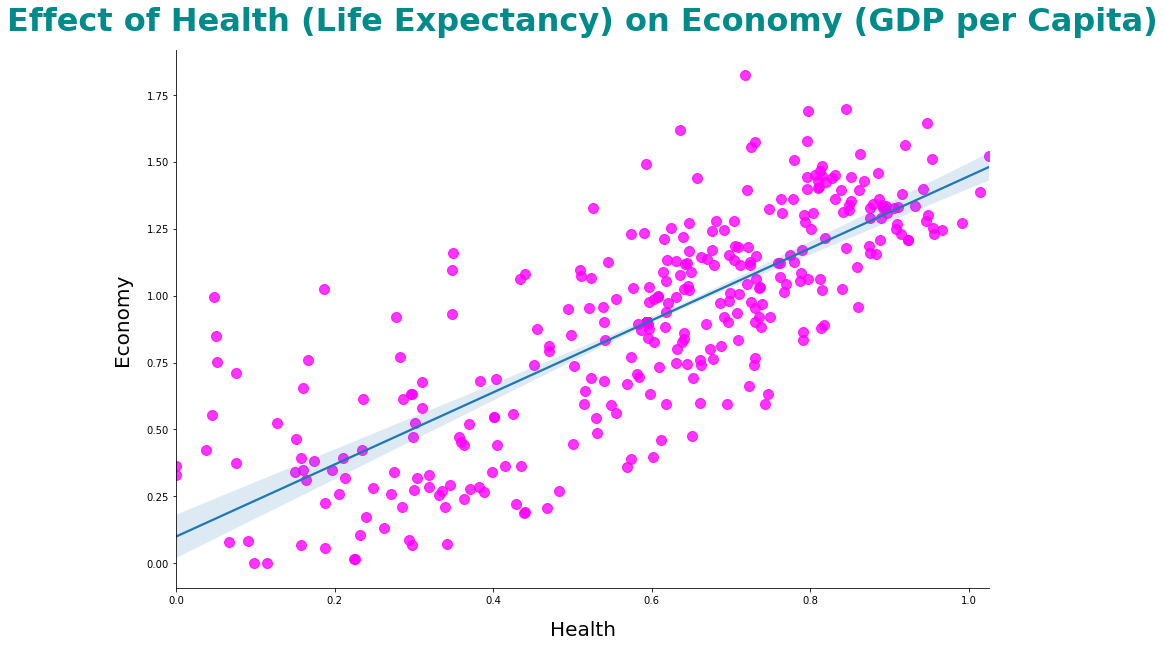

In [30]:
sns.lmplot(x='Health (Life Expectancy)',y='Economy (GDP per Capita)',data=df,scatter_kws={'s':100,'color': 'magenta'},height=8,aspect=1.5)
plt.xlabel('Health',fontsize=20,labelpad=15)
plt.ylabel('Economy',fontsize=20,labelpad=15)
plt.title('Effect of Health (Life Expectancy) on Economy (GDP per Capita)',fontsize=32,pad=20,color='darkcyan',fontweight='bold')
plt.show()

### **There is a really strong positive correlation between health (life expectancy) and economy (GDP per capita).**

### **Let's analyze worldwide happiness score distribution using Choropleth map.**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     782 non-null    float64
dtypes: float64(7), object(2)
memory usage: 77.3+ KB


In [32]:
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['Happiness Score'],
            colorbar=dict(title='Happiness Score'),
            colorscale='portland',
            text=df['Country']
          )
layout = dict(title='World Happiness Report',
              geo=dict(showframe=False,
                       projection=dict(type='natural earth')
                       )
              )

In [33]:
choromap = go.Figure(data = [data],layout=layout)
iplot(choromap,validate=False)

<Figure size 1080x576 with 0 Axes>

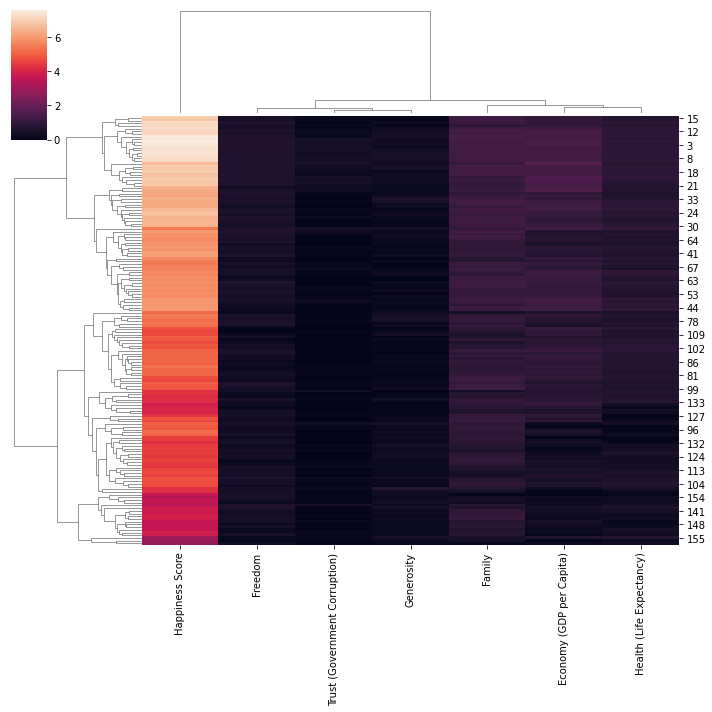

In [34]:
plt.figure(figsize=(15,8))
sns.clustermap(df_numerical)

Text(0.5, 1.0, 'Relationship between Economy and Happiness Score')

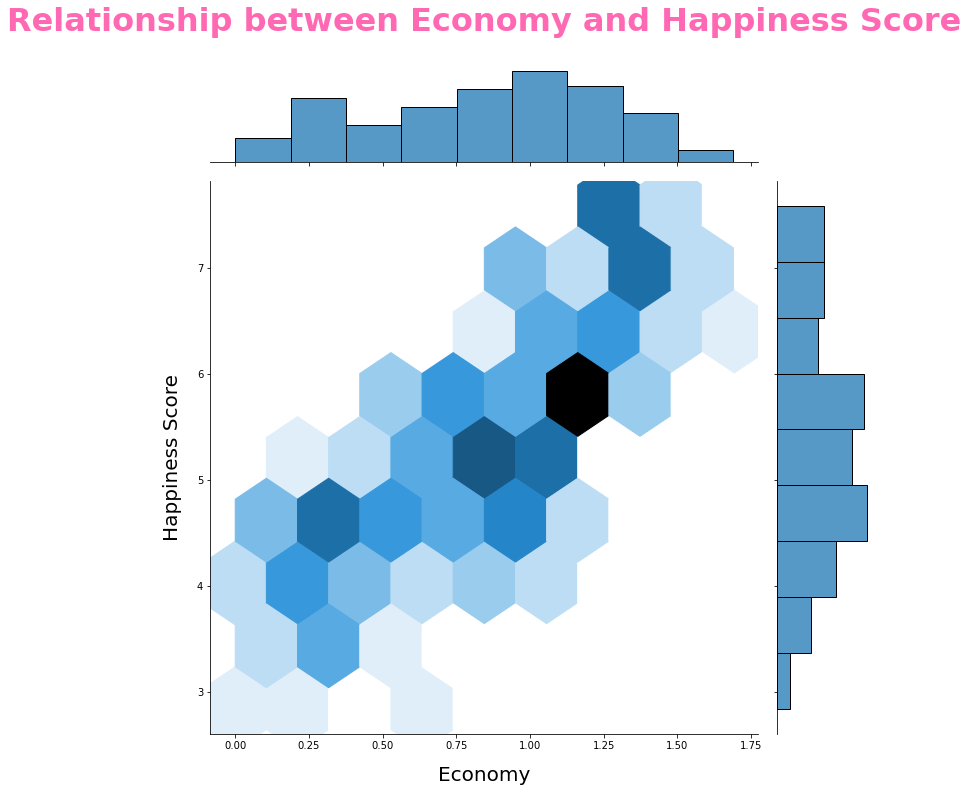

In [35]:
sns.jointplot(data=df_numerical,x='Economy (GDP per Capita)',y='Happiness Score',height=10,kind='hex')
plt.xlabel('Economy',fontsize=20,labelpad=15)
plt.ylabel('Happiness Score',fontsize=20,labelpad=15)
plt.title('Relationship between Economy and Happiness Score',fontsize=32,color='hotpink',fontweight='bold',pad=150)

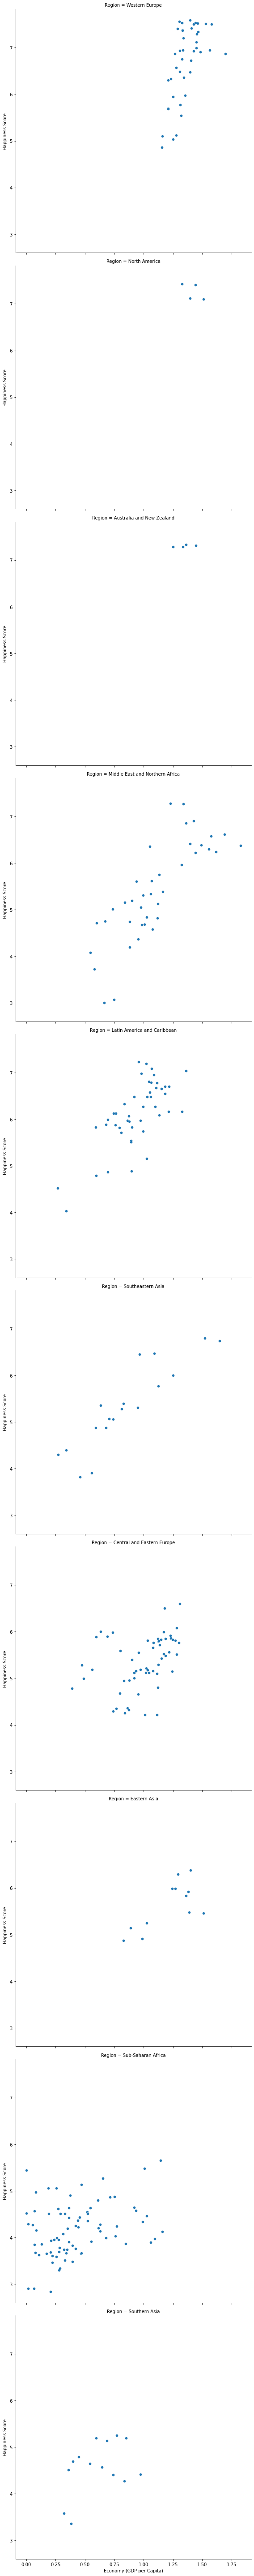

In [36]:
g = sns.FacetGrid(df,row='Region',height=8)
g.map(sns.scatterplot,'Economy (GDP per Capita)','Happiness Score')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '0.17344'),
  Text(1, 0, '0.30335'),
  Text(2, 0, '0.40306'),
  Text(3, 0, '0.45091'),
  Text(4, 0, '0.49759'),
  Text(5, 0, '0.50073'),
  Text(6, 0, '0.51466'),
  Text(7, 0, '0.51529'),
  Text(8, 0, '0.52989'),
  Text(9, 0, '0.56874'),
  Text(10, 0, '0.57407'),
  Text(11, 0, '0.60164'),
  Text(12, 0, '0.62007'),
  Text(13, 0, '0.70806')])

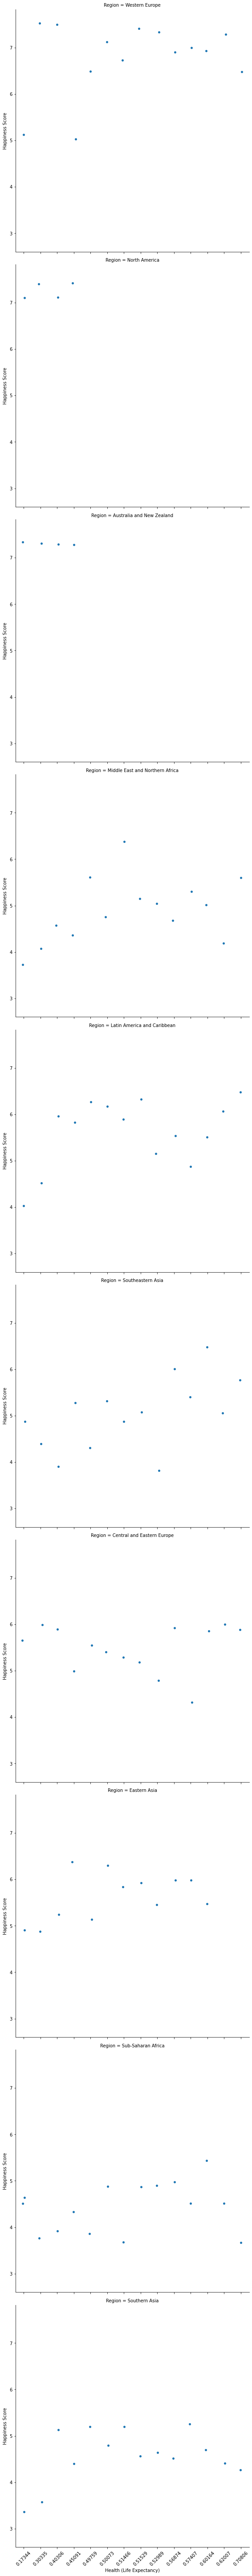

In [37]:
g = sns.FacetGrid(df,row='Region',height=8)
g.map(sns.stripplot,'Health (Life Expectancy)','Happiness Score')
plt.xticks(rotation=45)

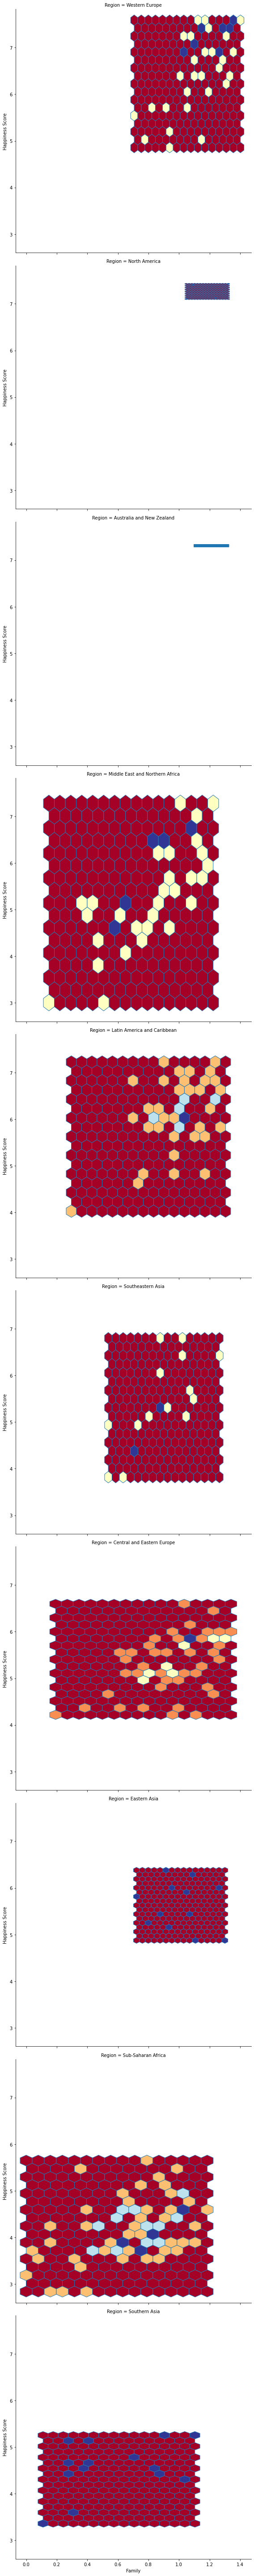

In [38]:
g = sns.FacetGrid(df,row='Region',height=8)
g.map(plt.hexbin,'Family','Happiness Score',gridsize=15,cmap='RdYlBu')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '0.12102'),
  Text(1, 0, '0.14622'),
  Text(2, 0, '0.1643'),
  Text(3, 0, '0.23414'),
  Text(4, 0, '0.37012'),
  Text(5, 0, '0.38282'),
  Text(6, 0, '0.39778'),
  Text(7, 0, '0.39786'),
  Text(8, 0, '0.40285'),
  Text(9, 0, '0.4082'),
  Text(10, 0, '0.46074'),
  Text(11, 0, '0.50817'),
  Text(12, 0, '0.53206'),
  Text(13, 0, '0.53726')])

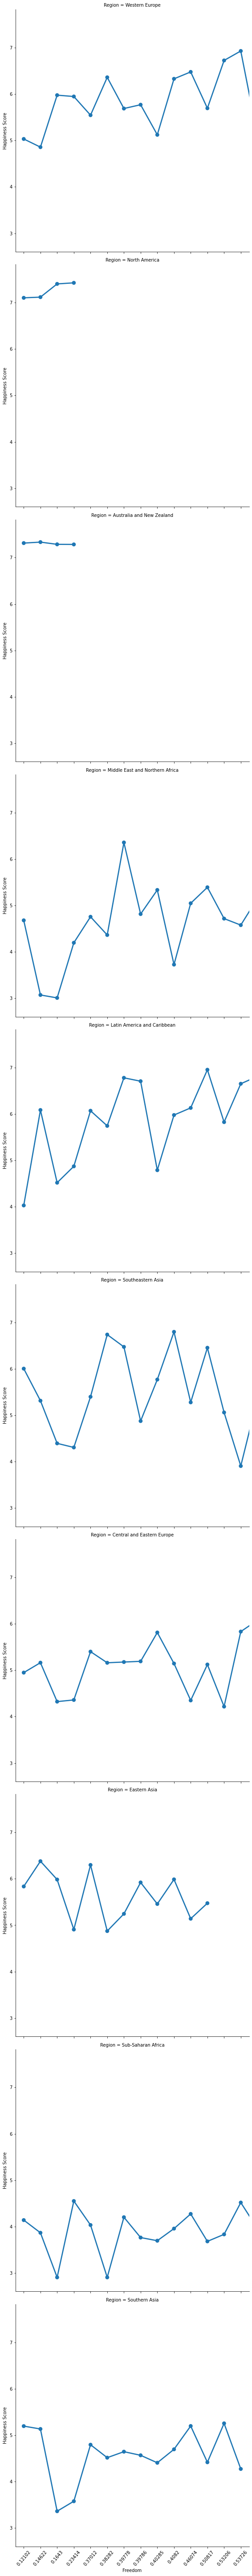

In [39]:
g = sns.FacetGrid(df,row='Region',height=8)
g.map(sns.pointplot,'Freedom','Happiness Score')
plt.xticks(rotation=50)

Handling Missing values and Categorical Values


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     782 non-null    float64
dtypes: float64(7), object(2)
memory usage: 77.3+ KB


In [41]:
df.isnull().sum()

Country                          312
Region                           467
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)    467
Generosity                         0
dtype: int64

In [42]:
o = (df.dtypes == 'object') 

object_cols = o[o].index 
print(f'Categorical Variables : {object_cols}')

Categorical Variables : Index(['Country', 'Region'], dtype='object')


In [44]:
trust_mean = df['Trust (Government Corruption)'].mean()
df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].fillna(trust_mean)

In [45]:
df[object_cols].isnull().sum()

Country     20
Region     464
dtype: int64

In [58]:
df.isnull().sum()

Country                           20
Region                           464
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
dtype: int64

In [64]:
df[object_cols] = df[~df[object_cols].isnull()][object_cols]

In [65]:
oe = OrdinalEncoder()


df[object_cols] = oe.fit_transform(df[object_cols])



In [66]:
sc = StandardScaler()

df_columns = df.columns 

df[df_columns] = sc.fit_transform(df[df_columns])



In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        318 non-null    float64
 1   Region                         318 non-null    float64
 2   Happiness Score                318 non-null    float64
 3   Economy (GDP per Capita)       318 non-null    float64
 4   Family                         318 non-null    float64
 5   Health (Life Expectancy)       318 non-null    float64
 6   Freedom                        318 non-null    float64
 7   Trust (Government Corruption)  318 non-null    float64
 8   Generosity                     318 non-null    float64
dtypes: float64(9)
memory usage: 24.8 KB


In [68]:
country_mean = df['Country'].mean()
region_mean = df['Region'].mean()
df['Country'] = df['Country'].fillna(country_mean)
df['Region'] = df['Region'].fillna(region_mean)


print(f'Null Value sum : {df.isnull().sum()}')


Null Value sum : Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64


In [69]:
features = df[['Family','Freedom','Economy (GDP per Capita)','Health (Life Expectancy)']]
label = df['Happiness Score']

In [70]:
x_train,x_test ,y_train,y_test= train_test_split(features , label , test_size = 0.2 , random_state = 42)
print(f'x train shape : {x_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'x test shape : {x_test.shape}')
print(f'y test shape : {y_test.shape}')

x train shape : (254, 4)
y train shape : (254,)
x test shape : (64, 4)
y test shape : (64,)


In [71]:
lr_model = LinearRegression()

lr_model.fit(x_train,y_train)


predict_train = lr_model.predict(x_train)
predict_test = lr_model.predict(x_test)


#Root Mean Squared Error on train and test sets, 

print(f'RMSE on train data : {mean_squared_error(y_train,predict_train)**(0.5)}')
print(f'RMSE on test data : {mean_squared_error(y_test,predict_test)**(0.5)}')

RMSE on train data : 0.5169123292553648
RMSE on test data : 0.40289701999462824


Feature: 0, Score: 0.21700
Feature: 1, Score: 0.19920
Feature: 2, Score: 0.40979
Feature: 3, Score: 0.21513


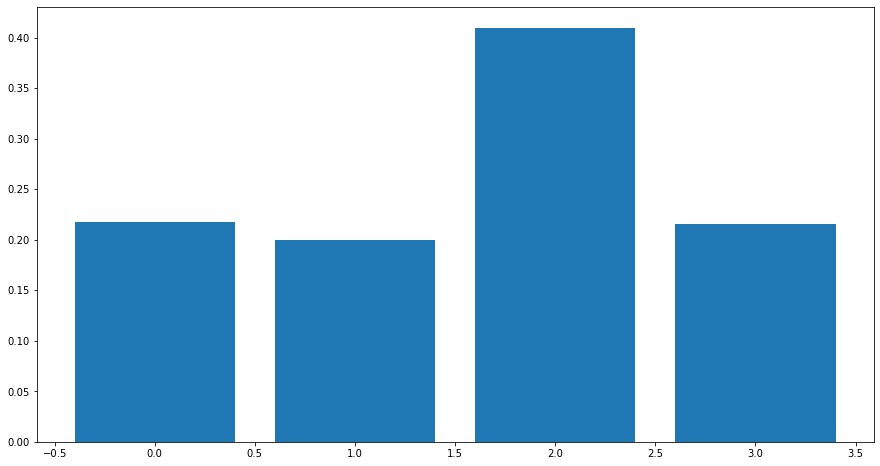

In [72]:
#Feature Importance of Linear Regression
lr_importance = lr_model.coef_
# summarize feature importance with linear regression
for i,v in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance with linear regression
pyplot.bar([x for x in range(len(lr_importance))], lr_importance)
pyplot.show()

In [73]:
rf_model = RandomForestRegressor(random_state = 42)

rf_model.fit(x_train,y_train)

predict_train = rf_model.predict(x_train)
predict_test = rf_model.predict(x_test)

#Root Mean Squared Error on train and test sets, 

print(f'RMSE on train data : {mean_squared_error(y_train,predict_train)**(0.5)}')
print(f'RMSE on test data : {mean_squared_error(y_test,predict_test)**(0.5)}')

RMSE on train data : 0.19308033819929735
RMSE on test data : 0.4305528294723755


In [74]:
y_pred_lr_model = lr_model.predict(x_test)
y_pred_rf_model = rf_model.predict(x_test)
y_pred_lr_model, y_pred_rf_model

(array([ 0.18510036, -0.60655698,  1.27240179, -0.03829551,  1.36955963,
         0.09688581,  1.15591206,  0.67624924,  0.50485187, -0.73243254,
         0.21725857,  0.08136331,  1.05098412,  1.06512009,  0.97004332,
        -0.57849406,  0.98014776, -0.70030629, -1.1384812 ,  0.01629529,
         0.38639099,  1.3181993 ,  0.18065339, -0.85226371,  0.22223814,
        -1.15686299, -1.45322992,  0.66910613, -0.9629758 ,  0.56129151,
        -0.38134663,  1.28205695,  1.13911382, -0.01450445, -1.25425117,
        -0.71991705,  0.98462438,  0.8299519 , -0.91507255,  0.68224316,
         1.34519463, -1.87208432, -0.6663366 , -0.74946154,  0.62216357,
         1.49470831, -0.68073091, -0.56049406,  0.26777308, -0.10257768,
         0.18747547, -0.05747193,  1.1107558 ,  1.11511813,  1.34053043,
         0.65239218, -0.18393335,  0.63244722,  0.74882941,  0.6100737 ,
         0.11802792, -0.20919705, -1.26707301, -0.60627938]),
 array([ 0.05554016, -0.50114151,  1.68788004,  0.15737131,  1

Linear Regression Model predicted better than Random Forest.